In [11]:
import pandas as pd

# Load and clean the patient dataset
try:
    # Load the dataset
    patient_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv")
    
    # Basic cleanup steps
    initial_shape = patient_data.shape
    missing_values = patient_data.isnull().sum()  # Check for missing values
    
    # Remove duplicate rows
    patient_data_cleaned = patient_data.drop_duplicates()
    
    # Handle missing values (drop rows with missing values for simplicity)
    patient_data_cleaned = patient_data_cleaned.dropna()
    final_shape = patient_data_cleaned.shape
    
    # Provide a summary of the cleaning process
    cleaning_summary = pd.DataFrame({
        "Metric": ["Initial Rows", "Initial Columns", "Final Rows", "Final Columns", "Total Missing Values"],
        "Value": [
            initial_shape[0], initial_shape[1], 
            final_shape[0], final_shape[1], 
            missing_values.sum()
        ]
    })
    
    # Display the cleaning summary to the user
    import ace_tools as tools; tools.display_dataframe_to_user(name="Patient Data Cleaning Summary", dataframe=cleaning_summary)

    # Display a preview of the cleaned data
    tools.display_dataframe_to_user(name="Cleaned Patient Data Preview", dataframe=patient_data_cleaned.head())

except Exception as e:
    str(e)


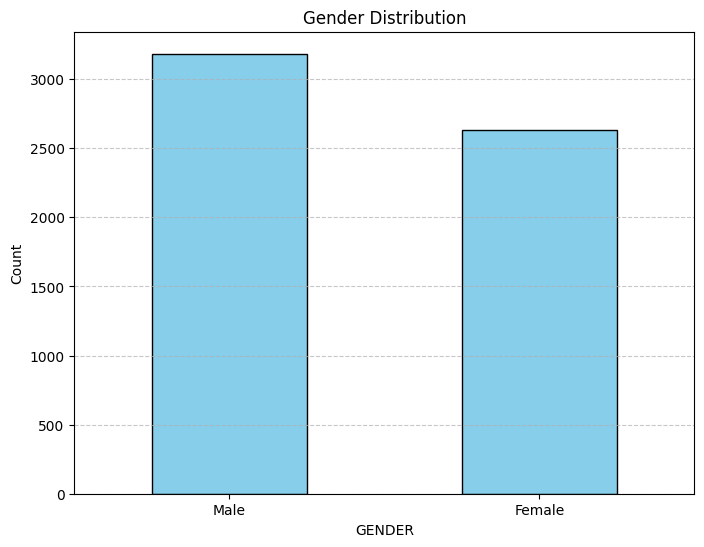

In [20]:
# Gender Distribution with Legend

import matplotlib.pyplot as plt
import pandas as pd

# Load and clean the dataset
try:
    # Load the dataset
    patient_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv")
    patient_data_cleaned = patient_data.drop_duplicates().dropna()
    
    # Gender legend
    gender_legend = {
        1: "Male",
        2: "Female",
        9: "Indeterminate",
        "X": "Not Known"
    }
    
    # Check if the 'gender' column exists and plot
    if "GENDER" in patient_data_cleaned.columns:
        # Map gender codes to descriptions
        patient_data_cleaned["gender_desc"] = patient_data_cleaned["GENDER"].map(gender_legend)
        
        # Plot the gender distribution
        plt.figure(figsize=(8, 6))
        patient_data_cleaned["gender_desc"].value_counts().plot(kind="bar", color="skyblue", edgecolor='k')
        plt.title("Gender Distribution")
        plt.xlabel("GENDER")
        plt.ylabel("Count")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Column 'gender' not found in the dataset.")

except Exception as e:
    print(f"An error occurred: {str(e)}")

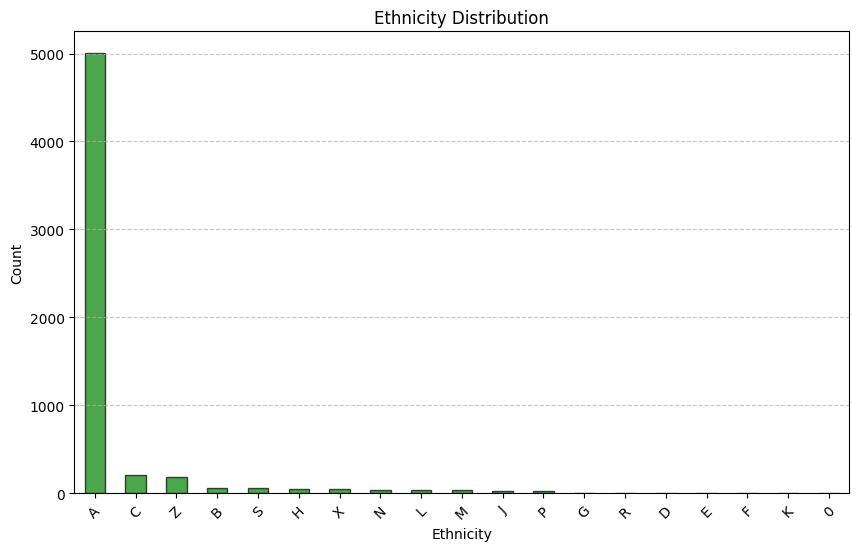


Ethnicity Legend:
0: WHITE
8: 8 OTHER
A: WHITE BRITISH
B: WHITE IRISH
C: C ANY OTHER WHITE BACKGROUND
C2: Northern Irish
C3: Other white, white unspecified
CA: English
CB: Scottish
CC: Welsh
CD: Cornish
CE: Cypriot (part not stated)
CF: Greek
CG: Greek Cypriot
CH: Turkish
CJ: Turkish Cypriot
CK: Italian
CL: Irish Traveller
CM: Traveller
CN: Gypsy/Romany
CP: Polish
CQ: All republics which made up the former USSR
CR: Kosovan
CS: Albanian
CT: Bosnian
CU: Croatian
CV: Serbian
CW: Other republics which made up the former Yugoslavia
CX: Mixed white
CY: Other white European, European unspecified, European mixed
D: WHITE AND BLACK CARIBBEAN
E: MIXED WHITE AND BLACK AFRICAN
F: MIXED WHITE AND ASIAN
G: G ANY OTHER MIXED BACKGROUND
GA: Black and Asian
GB: Black and Chinese
GC: Black and White
GD: Chinese and White
GE: Asian and Chinese
GF: Other Mixed, Mixed Unspecified
H: ASIAN INDIAN
J: ASIAN PAKISTANI
K: ASIAN BANGLADESHI
L: L ANY OTHER ASIAN BACKGROUND
LA: Mixed Asian
LB: Punjabi
LC: Kashmir

In [24]:
# Ethnicity Distribution with Legend
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean the dataset
try:
    # Load the patient dataset
    patient_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv")
    patient_data_cleaned = patient_data.drop_duplicates().dropna()
    
    # Load the ethnicity lookup table
    ethnicity_lookup = pd.read_excel("C:/Users/wardo/Documents/Internship/cancer_download/Documents/all_z_lookup_tables.xlsx", sheet_name="zethnicity")
    
    # Create a mapping dictionary from the lookup table
    ethnicity_mapping = dict(zip(ethnicity_lookup["Code"], ethnicity_lookup["Description"]))
    
    # Check if the 'ethnicity' column exists
    if "ETHNICITY" in patient_data_cleaned.columns:
        plt.figure(figsize=(10, 6))
        patient_data_cleaned["ETHNICITY"].value_counts().plot(kind="bar", color="green", edgecolor='k', alpha=0.7)
        plt.title("Ethnicity Distribution")
        plt.xlabel("Ethnicity")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        
# Display the legend separately
        print("\nEthnicity Legend:")
        for code, description in ethnicity_mapping.items():
            print(f"{code}: {description}")
   
    else:
        print("Column 'ethnicity' not found in the dataset.")

except Exception as e:
    print(f"An error occurred: {str(e)}")


In [52]:
import pandas as pd

try:
    # Load the dataset
    file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
    patient_data = pd.read_csv(file_path)

    # Check if the column J (VITALSTATUS) exists
    if "VITALSTATUS" in patient_data.columns:
        # Strip any whitespace and ensure consistency in casing
        patient_data["VITALSTATUS"] = patient_data["VITALSTATUS"].str.strip().str.upper()

        # Count occurrences of A (Alive) and D (Deceased)
        vital_status_counts = patient_data["VITALSTATUS"].value_counts()

        # Display the counts
        print("Counts of A (Alive) and D (Deceased) in VITALSTATUS column:")
        print(vital_status_counts)
    else:
        print("The column 'VITALSTATUS' was not found in the dataset.")

except Exception as e:
    print(f"An error occurred: {str(e)}")


Counts of A (Alive) and D (Deceased) in VITALSTATUS column:
VITALSTATUS
A     1232237
D      635048
X5       3007
D5        940
D4        229
X4         84
X2         45
D3         12
X           3
Name: count, dtype: int64


Counts of A (Alive), D (Deceased), and Other by Gender:
VITALSTATUS_GROUPED       A       D  Other
gender_description                        
Female               642918  296949   2198
Indeterminate             0       2      0
Male                 589319  338097   2122


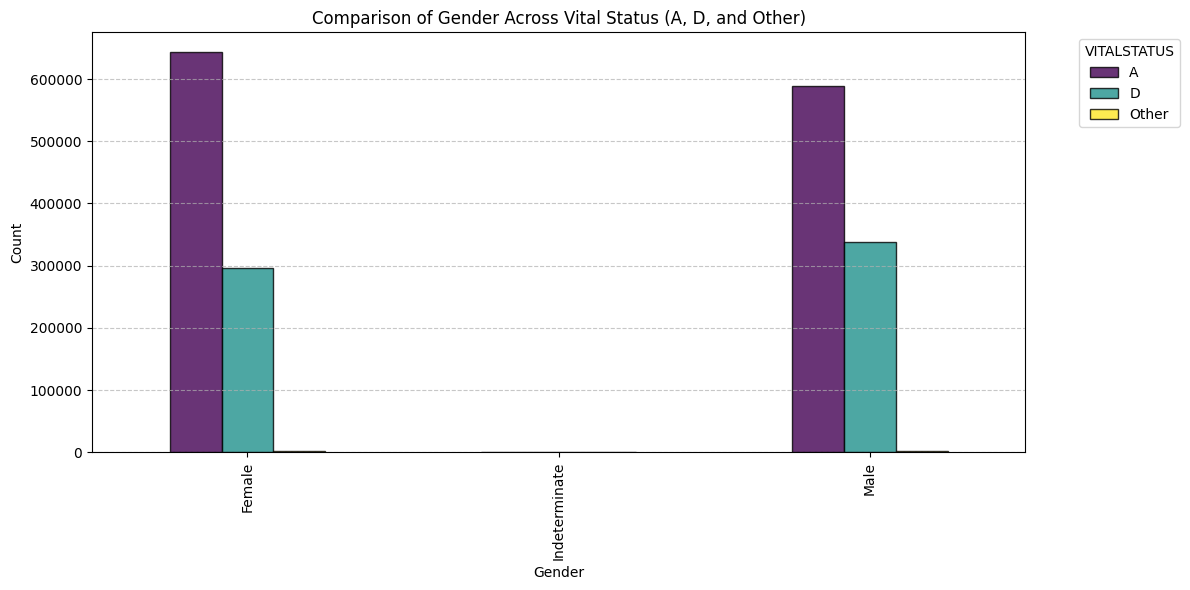

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Load the dataset
    file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_patient.csv"
    patient_data = pd.read_csv(file_path)

    # Check if the columns exist
    if "VITALSTATUS" in patient_data.columns and "GENDER" in patient_data.columns:
        # Normalize the VITALSTATUS column
        patient_data["VITALSTATUS"] = patient_data["VITALSTATUS"].str.strip().str.upper()

        # Group unexpected VITALSTATUS codes into "Other"
        valid_statuses = ["A", "D"]
        patient_data["VITALSTATUS_GROUPED"] = patient_data["VITALSTATUS"].apply(lambda x: x if x in valid_statuses else "Other")

        # Normalize the GENDER column
        gender_legend = {
            1: "Male",
            2: "Female",
            9: "Indeterminate",
            "X": "Not Known"
        }
        patient_data["gender_description"] = patient_data["GENDER"].map(gender_legend)

        # Create a crosstab for gender and grouped vital statuses
        comparison_data = pd.crosstab(patient_data["gender_description"], patient_data["VITALSTATUS_GROUPED"])

        # Display the counts in the console
        print("Counts of A (Alive), D (Deceased), and Other by Gender:")
        print(comparison_data)

        # Plot the grouped bar chart
        comparison_data.plot(kind="bar", figsize=(12, 6), edgecolor='k', alpha=0.8, colormap="viridis")
        plt.title("Comparison of Gender Across Vital Status (A, D, and Other)")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.legend(title="VITALSTATUS", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("The columns 'VITALSTATUS' or 'GENDER' were not found in the dataset.")

except Exception as e:
    print(f"An error occurred: {str(e)}")
